<a href="https://colab.research.google.com/github/ArunKoundinya/DeepLearning/blob/main/posts/deep-learning-project-msis/AmazonReviews_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Reviews Sentiment Analysis - Part 1

In this file we will perform the following steps

-  Loading the Data
-  Data Cleaning
-  Data Pre-Processing with NLTK
-  Exploratory Data Analysis
-  Train, Development and Test Dataset.

## Table of Contents
- [1 - Packages](#1)
- [2 - Loading the Dataset](#2)
- [3 - Defining Preprocess Function ](#3)
- [4 - Data Cleaning ](#4)
- [5 - Exploratory Data Analysis](#5)
    - [Data Distribution](#plot-1)
    - [Word Distribution](#plot-2)
    - [Word Cloud](#plot-3)
- [6 - Saving Datasets](#6)

<a name='1'></a>
## 1 - Packages

In [ ]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=5a85bdd5eb27798b8ff75cfd25ce80f4ea53e261b45231fb75cbcf46dc7afd46
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np


from plotnine import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from pandarallel import pandarallel
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


<a name='2'></a>
## 2 - Loading the Dataset

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/MSIS/IntroductiontoDeepLearning/Project/')

testdata = pd.read_csv('test.csv', header=None)
traindata = pd.read_csv('train.csv', header=None)

# Create custom headers
headers = ["class_index", "review_title", "review_text"]

testdata.columns = headers
traindata.columns = headers


Mounted at /content/drive


In [ ]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
## Manually Updated after 27th April 2024
stop_words = set(stopwords.words('english')) - { 'not', 'no', 'couldn', "couldn't", "wouldn't", "shouldn't", "isn't",
                                                "aren't", "wasn't", "weren't", "don't", "doesn't", "hadn't", "hasn't",
                                                 "won't", "can't", "mightn't","needn't","nor","shouldn","should've","should",
                                                 "weren","wouldn","mustn't","mustn","didn't","didn","doesn","did","does","hadn",
                                                 "hasn","haven't","haven","needn","shan't"}


In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'do',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 "she's",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 '

<a name='sample'></a>
### 2.1 Random Sampling 10 Lac Rows from Training Dataset

In [ ]:
print(traindata.shape)
print(testdata.shape)

(3600000, 3)
(400000, 3)


In [ ]:
train_data = traindata
test_data = testdata

In [ ]:
del traindata,testdata

Here we are deleting the loaded dataframes because to free up the memory

In [ ]:
train_data.head()

,class_index,review_title,review_text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [ ]:
test_data.head()

,class_index,review_title,review_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [ ]:
import gc
gc.collect()

0

<a name='3'></a>
## 3 - Preprocess Function using NLTK

In [ ]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text into words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    text = ' '.join(words)
    return text

Above function will token the words of the input sentence and then remove stop words and remove punctuations and finally lemmatized words are extracted.

<a name='4'></a>
## 4 - Data Cleaning

In [ ]:
train_data.head(1)

,class_index,review_title,review_text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...


If we can see both review_title and review_text are important as review_title has those attention words which might help for modelling to capture and use those words as well.


So, let us combine these two columns into one

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   class_index   int64 
 1   review_title  object
 2   review_text   object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [ ]:
train_data['review_combined'] = train_data['review_title'] + " " + train_data['review_text']
test_data['review_combined'] = test_data['review_title'] + " " + test_data['review_text']

train_data = train_data[['class_index','review_combined']]
test_data = test_data[['class_index','review_combined']]

In [ ]:
train_data.head(1)

,class_index,review_combined
0,2,Stuning even for the non-gamer This sound trac...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   class_index      int64 
 1   review_combined  object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [ ]:
train_data['review_combined'] = train_data['review_combined'].fillna('')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   class_index      int64 
 1   review_combined  object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [ ]:
train_data['review_combined_lemma'] = train_data['review_combined'].apply(preprocess)

In [ ]:
train_data = train_data[['class_index','review_combined_lemma']]
train_data.head(1)

,class_index,review_combined_lemma
0,2,stuning even nongamer sound track beautiful pa...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   class_index            int64 
 1   review_combined_lemma  object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   class_index      400000 non-null  int64 
 1   review_combined  399976 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
test_data['review_combined'] = test_data['review_combined'].fillna('')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   class_index      400000 non-null  int64 
 1   review_combined  400000 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
test_data['review_combined_lemma'] = test_data['review_combined'].apply(preprocess)

In [ ]:
test_data = test_data[['class_index','review_combined_lemma']]
test_data.head(1)

,class_index,review_combined_lemma
0,2,great cd lovely pat one great voice generation...


<a name='5'></a>
## 5 - Exploratory Data Analysis

<a name='plot-1'></a>
### 5.1 Data Distribution

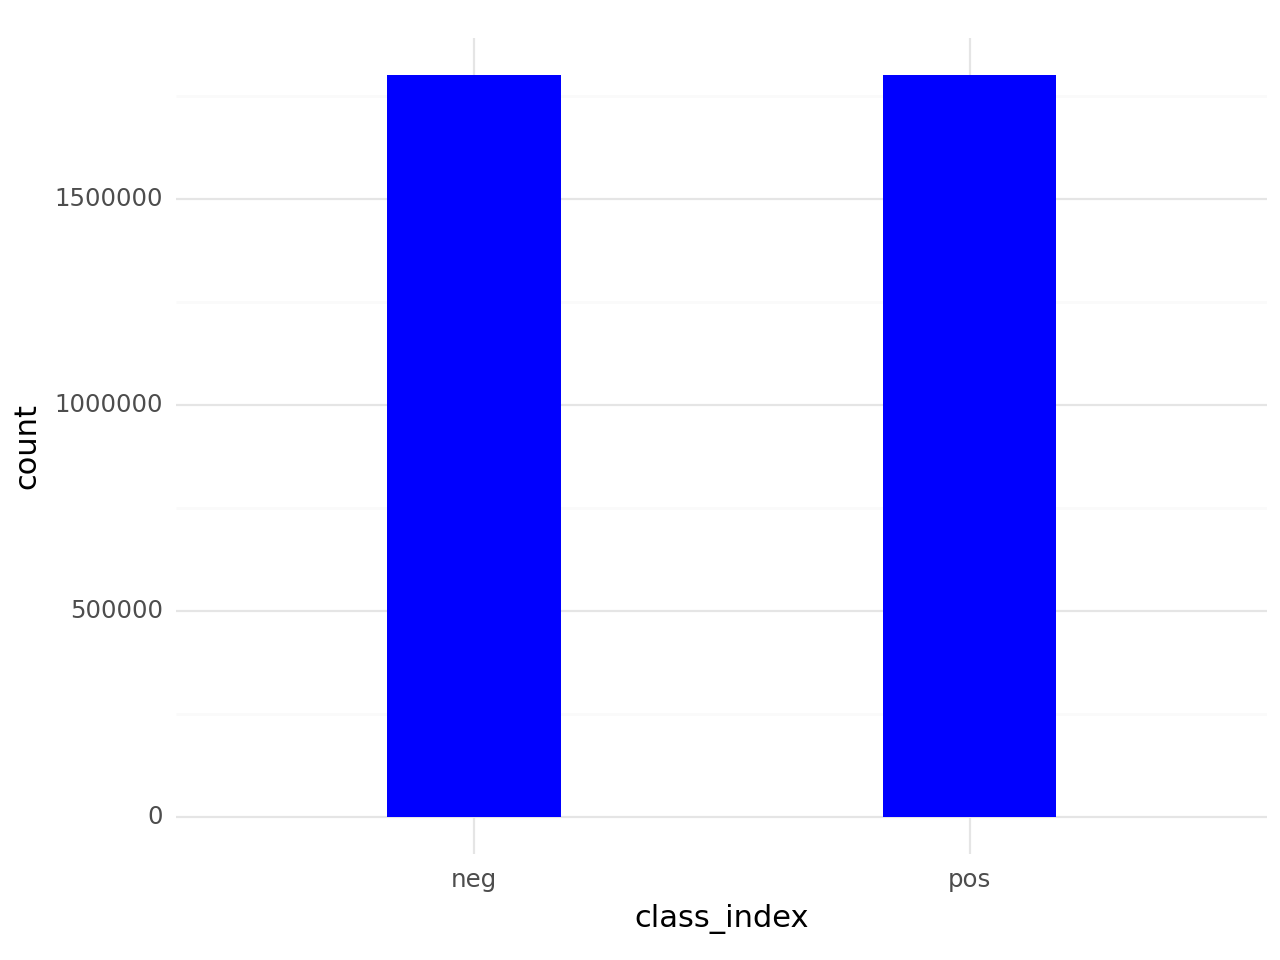

<Figure Size: (640 x 480)>

In [ ]:
(train_data >>
  ggplot(aes(x='class_index')) +
  geom_bar(fill='blue', width=0.35) +
  scale_x_discrete(labels=['neg', 'pos'], limits=['1', '2']) +
  theme_minimal()
)

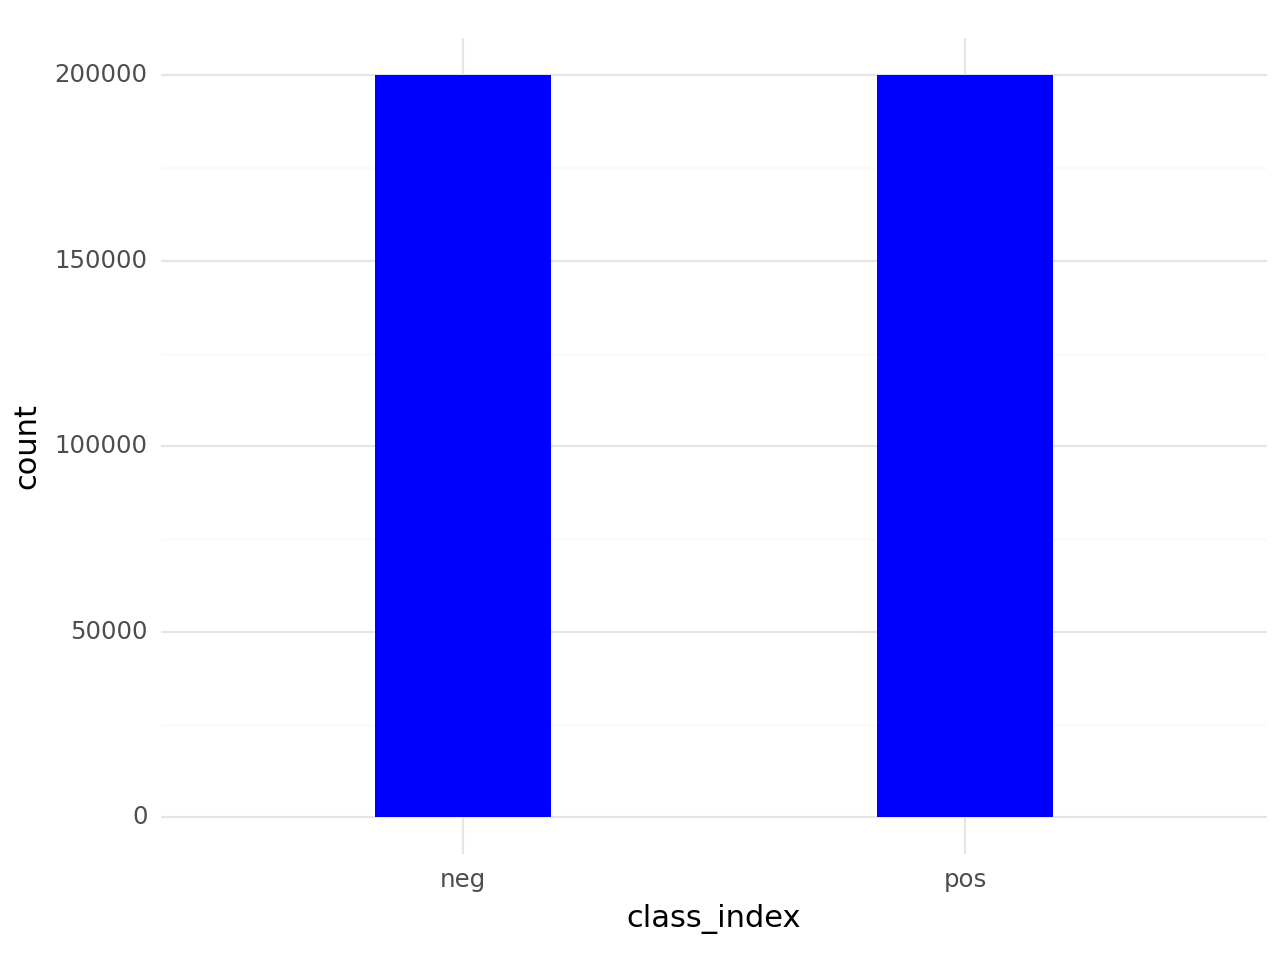

<Figure Size: (640 x 480)>

In [ ]:
(test_data >>
  ggplot(aes(x='class_index')) +
  geom_bar(fill='blue', width=0.35) +
  scale_x_discrete(labels=['neg', 'pos'], limits=['1', '2']) +
  theme_minimal()
)

Both test data and train data is evenly balanced.

<a name='plot-2'></a>
### 5.2 Word Distribution

In [ ]:
train_data.head(1)

,class_index,review_combined_lemma
0,2,stuning even nongamer sound track beautiful pa...


In [ ]:
train_data['wordlength'] = train_data['review_combined_lemma'].apply(lambda x: x.count(' '))+1

In [ ]:
train_data.head()

,class_index,review_combined_lemma,wordlength
0,2,stuning even nongamer sound track beautiful pa...,43
1,2,best soundtrack ever anything im reading lot r...,49
2,2,amazing soundtrack favorite music time hand in...,74
3,2,excellent soundtrack truly like soundtrack enj...,73
4,2,remember pull jaw floor hearing youve played g...,47


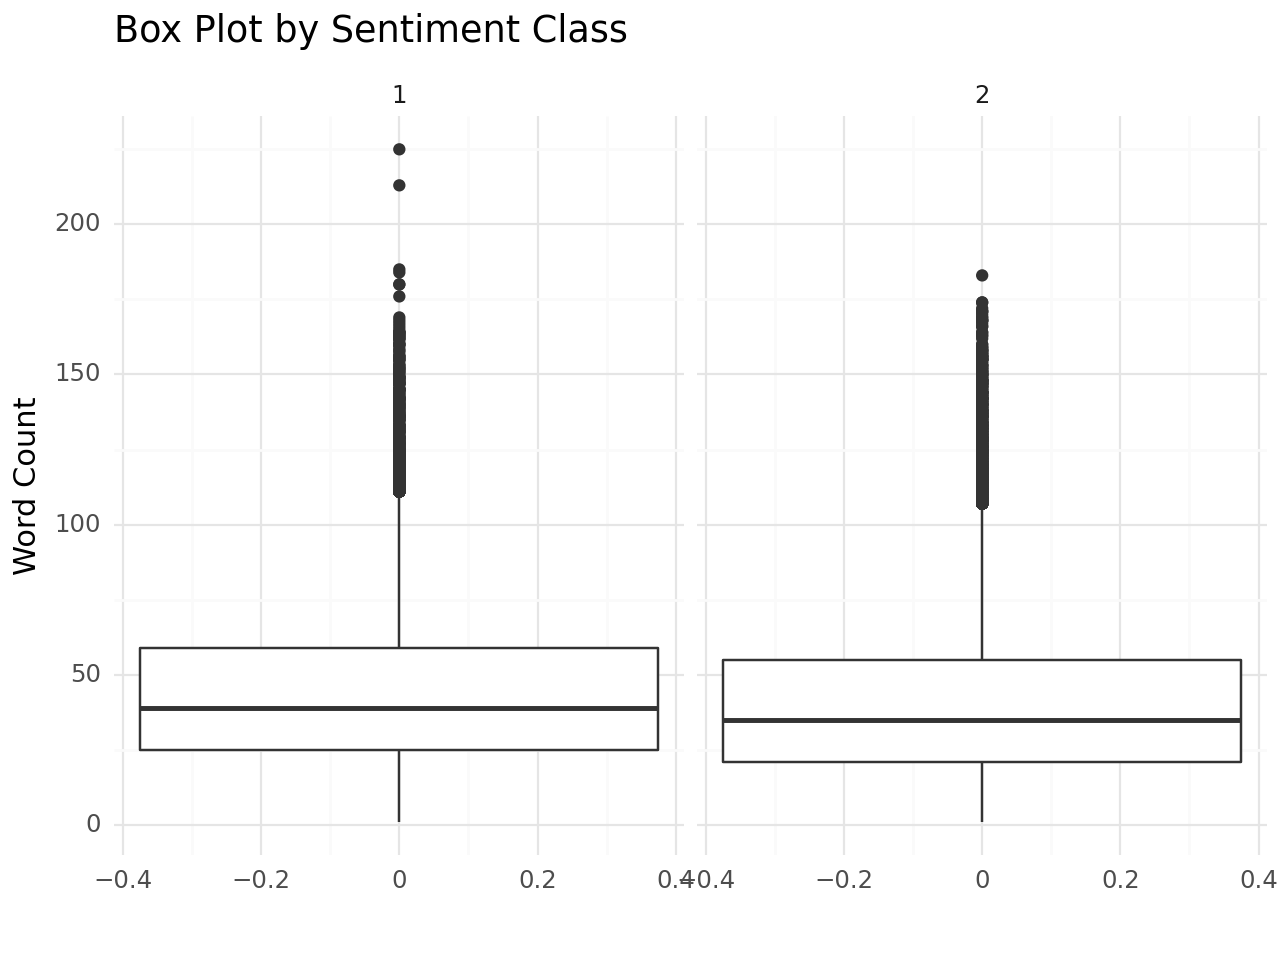

<Figure Size: (640 x 480)>

In [ ]:
(train_data >>
 ggplot(aes(y='wordlength'))+
 geom_boxplot() +
 facet_wrap('~class_index') +
 theme_minimal() +
 labs(
     x = " ",
     y = "Word Count",
     title = "Box Plot by Sentiment Class"
 )
)

In [ ]:
test_data['wordlength'] = test_data['review_combined_lemma'].apply(lambda x: x.count(' '))+1

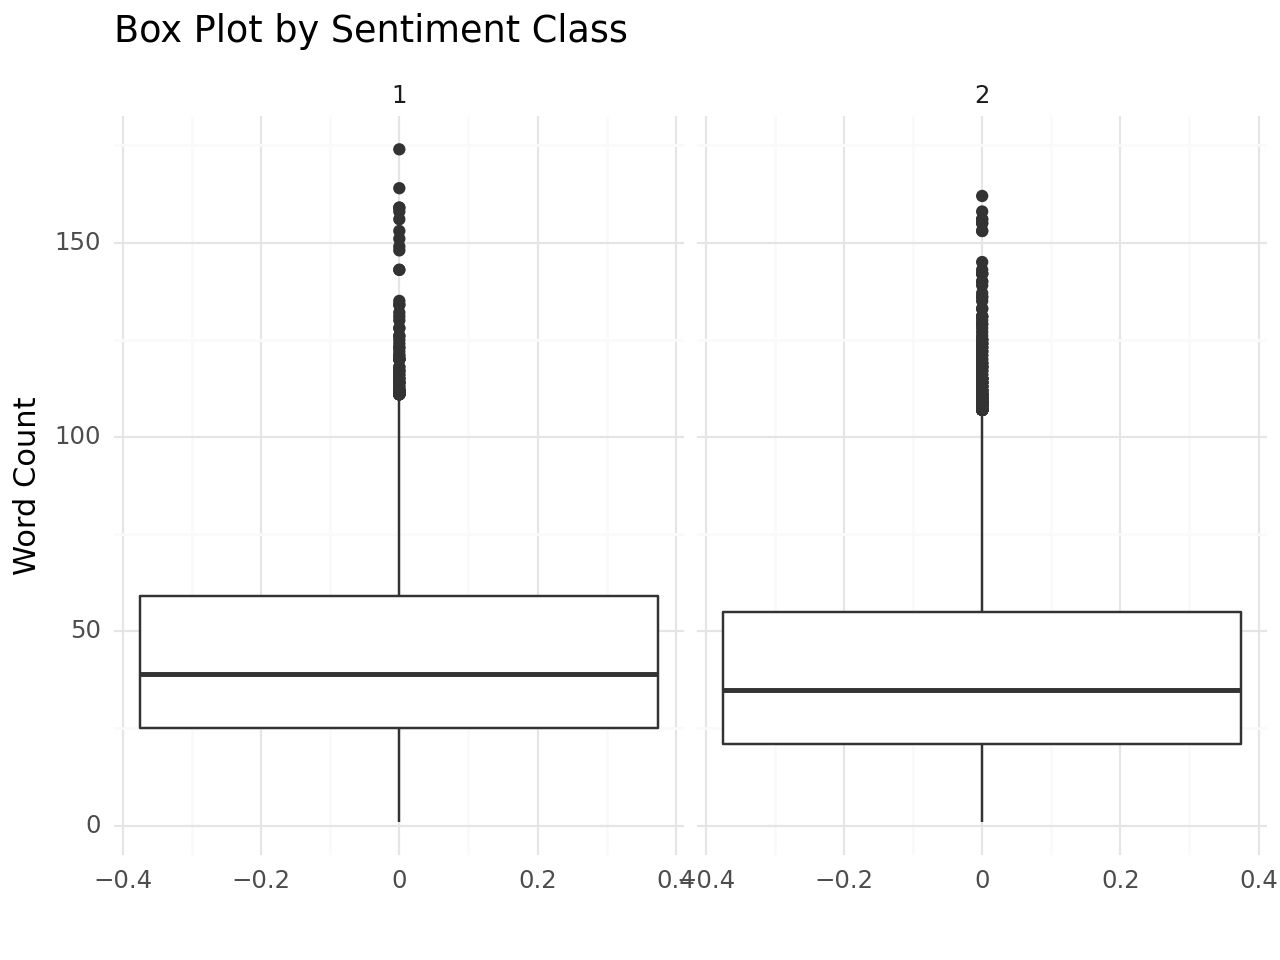

<Figure Size: (640 x 480)>

In [ ]:
(test_data >>
 ggplot(aes(y='wordlength'))+
 geom_boxplot() +
 facet_wrap('~class_index') +
 theme_minimal() +
 labs(
     x = " ",
     y = "Word Count",
     title = "Box Plot by Sentiment Class"
 )
)

Test and Train data is almost of similar distribution

<a name='plot-3'></a>
### 5.3 Word Cloud

In [ ]:
positive_reviews = ' '.join(test_data[test_data['class_index'] == 2]['review_combined_lemma'])
negative_reviews = ' '.join(test_data[test_data['class_index'] == 1]['review_combined_lemma'])

wordcloud_pos = WordCloud(width = 600, height = 400,
                          background_color ='white',
                          max_font_size=50, max_words=500 ).generate(positive_reviews)

wordcloud_neg = WordCloud(width = 600, height = 400,
                          background_color ='white',
                          max_font_size=50, max_words=500).generate(negative_reviews)


Text(0.5, 1.0, 'Positive Word Cloud')

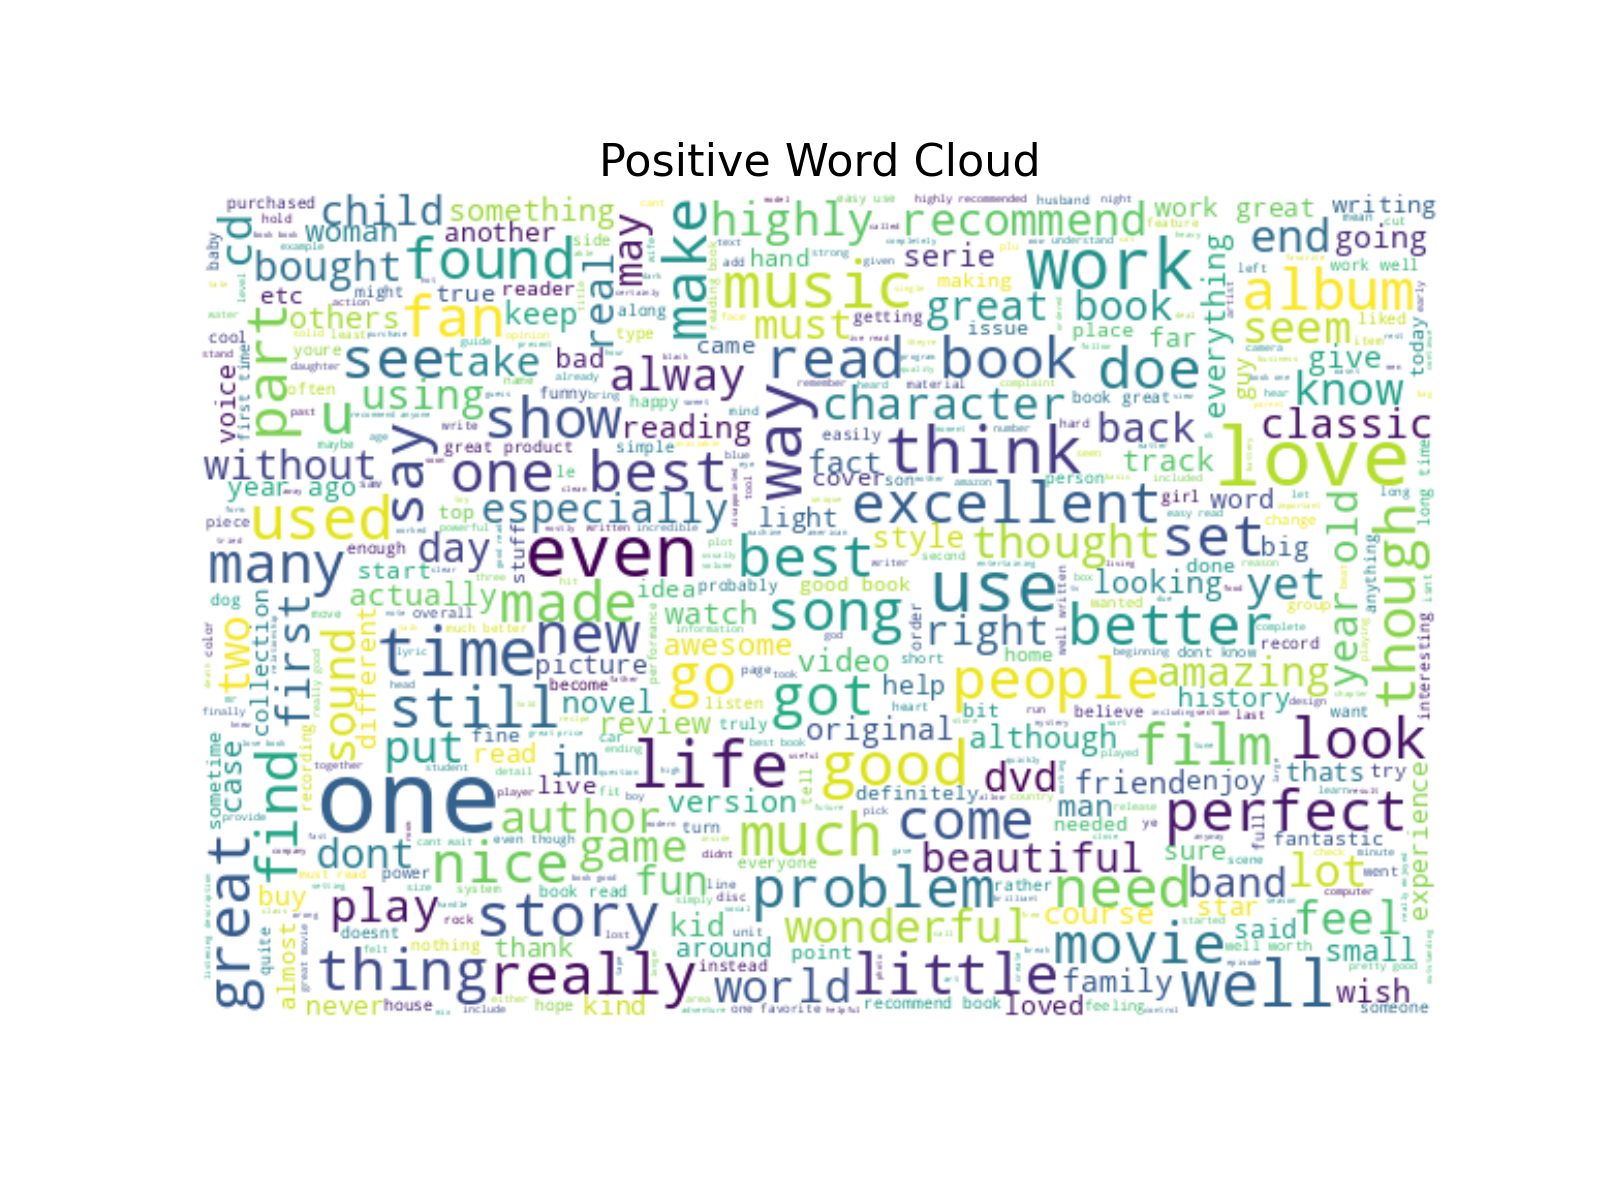

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Word Cloud",fontsize=16 )

Text(0.5, 1.0, 'Negative Word Cloud')

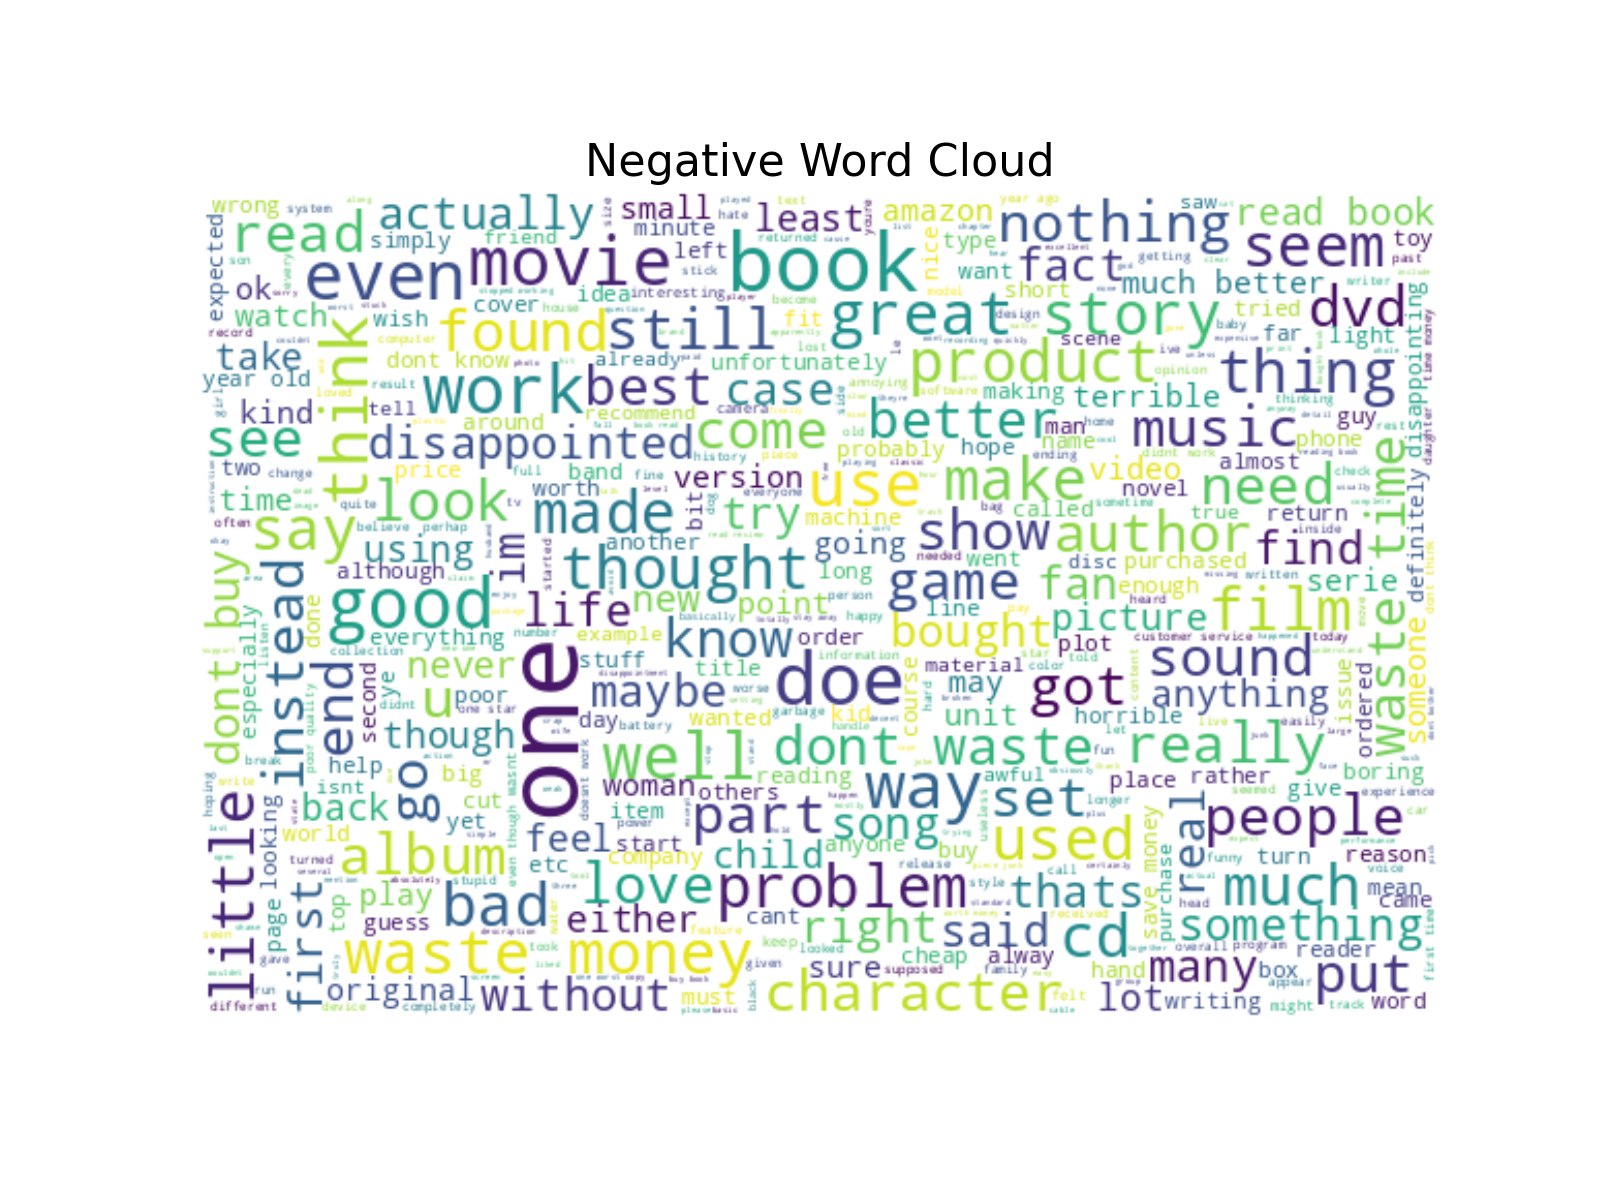

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Word Cloud",fontsize=16 )

<a name='6'></a>
## 6 - Copying the datasets back

In [ ]:
train_data=train_data[['class_index','review_combined_lemma']]
test_data=test_data[['class_index','review_combined_lemma']]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   class_index            int64 
 1   review_combined_lemma  object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   class_index            400000 non-null  int64 
 1   review_combined_lemma  400000 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
# Saving the sub sample for further modelling
train_data.to_csv("train_data_sample_complete.csv",index=False)
test_data.to_csv("test_data_sample_complete.csv",index=False)